# 1. Load dataset
#### In this assignment, you are expected to build a model that finds clusters in the given face images dataset.
#### You will need to read the data from the archive file (faces.zip). It contains 400 images of 40 persons. Each image is 64x64. You can use zipfile for extracting the images, os for iterating the files and PIL for reading the images. Person labels are in the file names. Make sure you preserve the order of images and labels.

In [5]:
# it is also a classification problem 
# y-label will be the name of each picture but pay attention that the first part of name,ignore the second part  

In [752]:
import os
from PIL import Image
from zipfile import ZipFile
ZipFile('faces.zip').extractall('images')
image_list=os.listdir('images')
image_list.sort(key=lambda x:int(x.split('_')[0]))

In [753]:
import numpy as np
import matplotlib.pyplot as plt
n=len(image_list)
image_array=np.zeros((n,64,64))  
for i in range(n):
    io=Image.open('images/'+image_list[i])
    print(io)
    image_array[i]=np.asarray(io) # change zeros array elements to images 

<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186D98AC0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E73880>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B1E730C6A0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B18ACFCDF0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E73820>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E5E0D0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B1E730C6A0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E73760>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186D98AC0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E5E0D0>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E73880>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E73760>
<PIL.PngImagePlugin.PngImageFile image mode=L size=64x64 at 0x1B186E73820>
<PIL.PngImagePlugin.PngIm

In [754]:
# 400 images 
# 64*64 = 4096 pixels 
X=image_array.reshape((400,4096))

In [755]:
X

array([[ 75.,  89., 101., ...,  37.,  39.,  38.],
       [110., 114., 124., ...,  37.,  37.,  37.],
       [ 77.,  97., 119., ...,  34.,  36.,  37.],
       ...,
       [121., 129., 147., ...,  43.,  36.,  46.],
       [ 52.,  53.,  53., ..., 139., 143., 146.],
       [125., 112.,  68., ...,  87.,  86.,  93.]])

In [756]:
X.shape

(400, 4096)

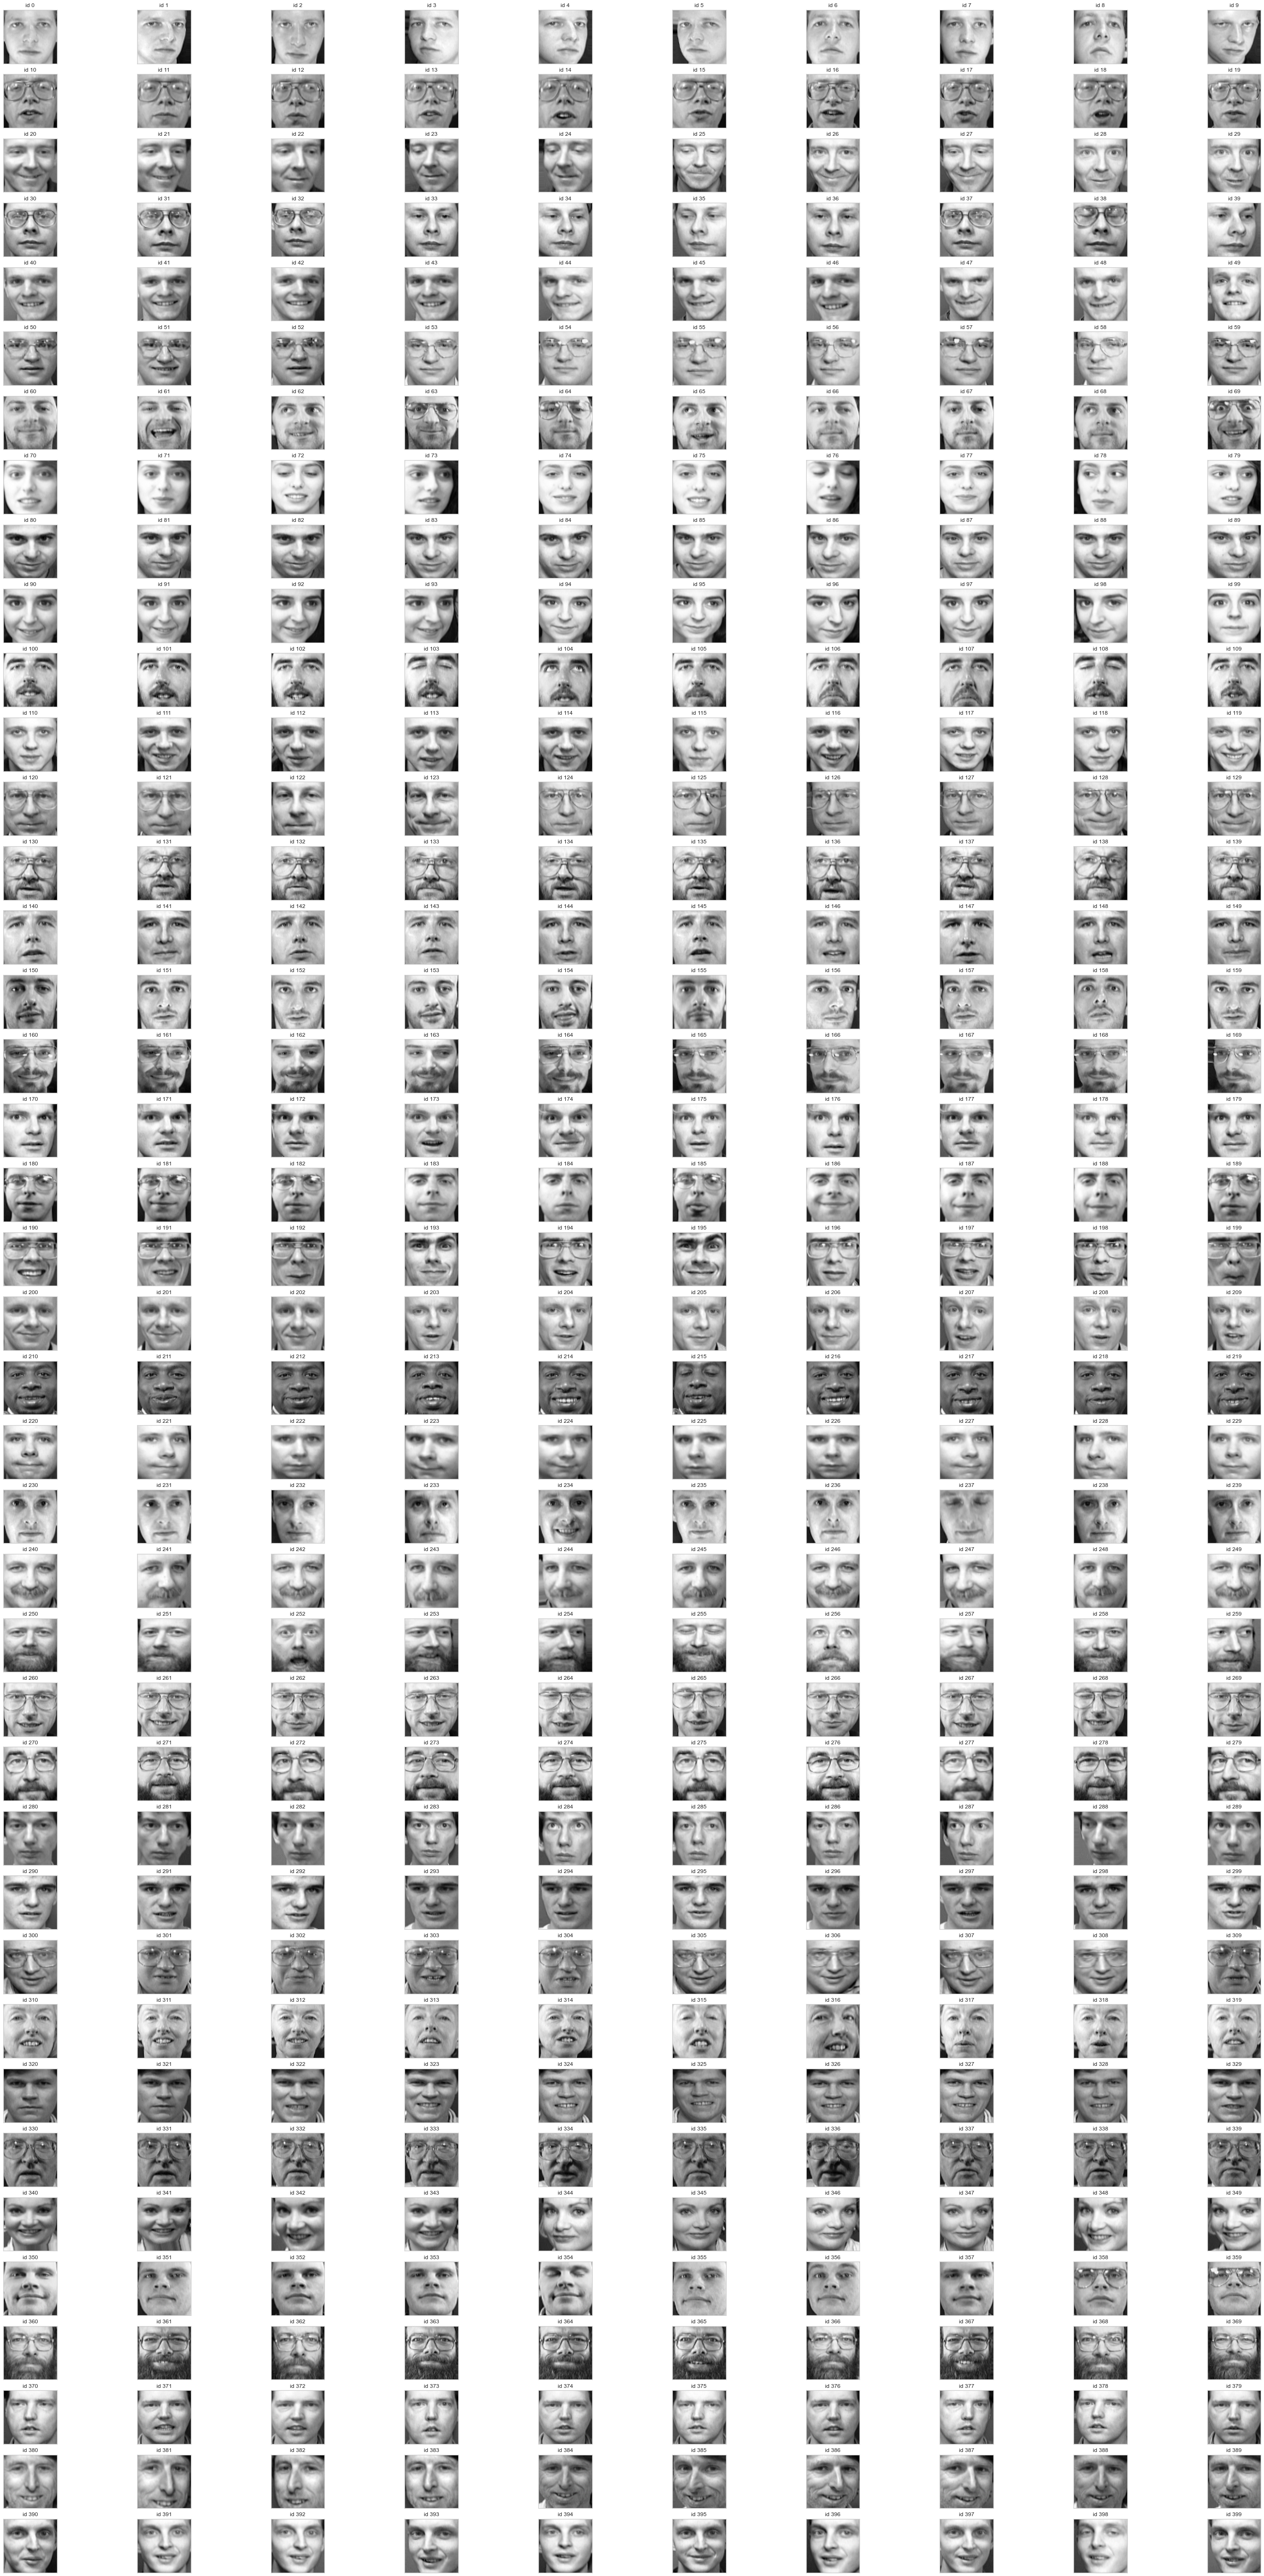

In [757]:
# to show all images 
def show_orignal_images(pixels):
    fig, axes = plt.subplots(40, 10, figsize=(50, 100),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
        ax.set_title("id " + str(i))
    plt.show()
show_orignal_images(X)

In [758]:
image_list

['0_0.png',
 '0_1.png',
 '0_2.png',
 '0_3.png',
 '0_4.png',
 '0_5.png',
 '0_6.png',
 '0_7.png',
 '0_8.png',
 '0_9.png',
 '1_0.png',
 '1_1.png',
 '1_2.png',
 '1_3.png',
 '1_4.png',
 '1_5.png',
 '1_6.png',
 '1_7.png',
 '1_8.png',
 '1_9.png',
 '2_0.png',
 '2_1.png',
 '2_2.png',
 '2_3.png',
 '2_4.png',
 '2_5.png',
 '2_6.png',
 '2_7.png',
 '2_8.png',
 '2_9.png',
 '3_0.png',
 '3_1.png',
 '3_2.png',
 '3_3.png',
 '3_4.png',
 '3_5.png',
 '3_6.png',
 '3_7.png',
 '3_8.png',
 '3_9.png',
 '4_0.png',
 '4_1.png',
 '4_2.png',
 '4_3.png',
 '4_4.png',
 '4_5.png',
 '4_6.png',
 '4_7.png',
 '4_8.png',
 '4_9.png',
 '5_0.png',
 '5_1.png',
 '5_2.png',
 '5_3.png',
 '5_4.png',
 '5_5.png',
 '5_6.png',
 '5_7.png',
 '5_8.png',
 '5_9.png',
 '6_0.png',
 '6_1.png',
 '6_2.png',
 '6_3.png',
 '6_4.png',
 '6_5.png',
 '6_6.png',
 '6_7.png',
 '6_8.png',
 '6_9.png',
 '7_0.png',
 '7_1.png',
 '7_2.png',
 '7_3.png',
 '7_4.png',
 '7_5.png',
 '7_6.png',
 '7_7.png',
 '7_8.png',
 '7_9.png',
 '8_0.png',
 '8_1.png',
 '8_2.png',
 '8_

In [759]:
len(image_list[0])

7

In [760]:
image_list=[image_list[i][0:-6] for i in range(len(image_list))] # labels
image_list

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 

In [761]:
df=pd.DataFrame(X,image_list)
df

0      1      2      3      4      5      6      7      8      9     ...  \
0    75.0   89.0  101.0  107.0  128.0  147.0  159.0  164.0  167.0  166.0  ...   
0   110.0  114.0  124.0  135.0  144.0  155.0  165.0  170.0  172.0  170.0  ...   
0    77.0   97.0  119.0  128.0  142.0  159.0  165.0  166.0  170.0  169.0  ...   
0    48.0   47.0   47.0   47.0   46.0   46.0   59.0   98.0  117.0  125.0  ...   
0   121.0  132.0  141.0  151.0  157.0  167.0  168.0  173.0  175.0  177.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
39   97.0  120.0  138.0  153.0  157.0  155.0  160.0  154.0  161.0  169.0  ...   
39   89.0   89.0   85.0   73.0   60.0   60.0   89.0  124.0  139.0  152.0  ...   
39  121.0  129.0  147.0  152.0  159.0  153.0  159.0  162.0  163.0  170.0  ...   
39   52.0   53.0   53.0   54.0   51.0   49.0   67.0   97.0  118.0  133.0  ...   
39  125.0  112.0   68.0   61.0   60.0   89.0  139.0  149.0  160.0  149.0  ...   

     4086   4087   4088   4089   4090   4091   4092   4093   4094   4095  
0   161.0  162.0  158.0  160.0  115.0   32.0   36.0   37.0   39.0   38.0  
0    33.0   38.0   33.0   36.0   37.0   37.0   37.0   37.0   37.0   37.0  
0    18.0   32.0   44.0   33.0   31.0   36.0   35.0   34.0   36.0   37.0  
0   158.0  154.0  159.0  166.0  176.0  180.0  185.0  182.0  182.0  179.0  
0    46.0   39.0   43.0   42.0   43.0   43.0   43.0   43.0   42.0   42.0  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
39   94.0   96.0   64.0   24.0   44.0   59.0   60.0   39.0   38.0   33.0  
39   92.0   81.0   70.0   69.0   82.0   98.0  111.0  118.0  124.0  133.0  
39   47.0   36.0   37.0   39.0   39.0   42.0   38.0   43.0   36.0   46.0  
39  108.0   95.0   89.0   99.0  116.0  127.0  132.0  139.0  143.0  146.0  
39   67.0   64.0   71.0   73.0   71.0   78.0   78.0   87.0   86.0   93.0  

[400 rows x 4096 columns]

In [762]:
df.shape

(400, 4096)

# 2. Prepare dataset
#### Normalize the dataset (for this instance, you can normalize the whole dataset before split). Split the dataset into train (280 instances), validation (80 instances) and test sets (40 instances). When splitting, make sure there are same number of images per person in each set.

In [763]:
# df =df/255
df = (df - df.min())/(df.max()-df.min())
df

0         1         2         3         4         5         6     \
0   0.310345  0.398907  0.417989  0.470874  0.551351  0.654054  0.715847   
0   0.511494  0.535519  0.539683  0.606796  0.637838  0.697297  0.748634   
0   0.321839  0.442623  0.513228  0.572816  0.627027  0.718919  0.748634   
0   0.155172  0.169399  0.132275  0.179612  0.108108  0.108108  0.169399   
0   0.574713  0.633880  0.629630  0.684466  0.708108  0.762162  0.765027   
..       ...       ...       ...       ...       ...       ...       ...   
39  0.436782  0.568306  0.613757  0.694175  0.708108  0.697297  0.721311   
39  0.390805  0.398907  0.333333  0.305825  0.183784  0.183784  0.333333   
39  0.574713  0.617486  0.661376  0.689320  0.718919  0.686486  0.715847   
39  0.178161  0.202186  0.164021  0.213592  0.135135  0.124324  0.213115   
39  0.597701  0.524590  0.243386  0.247573  0.183784  0.340541  0.606557   

        7         8         9     ...      4086      4087      4088      4089  \
0   0.743169  0.758242  0.745763  ...  0.827778  0.728571  0.717822  0.721951   
0   0.775956  0.785714  0.768362  ...  0.116667  0.138095  0.099010  0.117073   
0   0.754098  0.774725  0.762712  ...  0.033333  0.109524  0.153465  0.102439   
0   0.382514  0.483516  0.514124  ...  0.811111  0.690476  0.722772  0.751220   
0   0.792350  0.802198  0.807910  ...  0.188889  0.142857  0.148515  0.146341   
..       ...       ...       ...  ...       ...       ...       ...       ...   
39  0.688525  0.725275  0.762712  ...  0.455556  0.414286  0.252475  0.058537   
39  0.524590  0.604396  0.666667  ...  0.444444  0.342857  0.282178  0.278049   
39  0.732240  0.736264  0.768362  ...  0.194444  0.128571  0.118812  0.131707   
39  0.377049  0.489011  0.559322  ...  0.533333  0.409524  0.376238  0.424390   
39  0.661202  0.719780  0.649718  ...  0.305556  0.261905  0.287129  0.297561   

        4090      4091      4092      4093      4094      4095  
0   0.557292  0.140777  0.113744  0.109005  0.120603  0.157068  
0   0.151042  0.165049  0.118483  0.109005  0.110553  0.151832  
0   0.119792  0.160194  0.109005  0.094787  0.105528  0.151832  
0   0.875000  0.859223  0.819905  0.796209  0.839196  0.895288  
0   0.182292  0.194175  0.146919  0.137441  0.135678  0.178010  
..       ...       ...       ...       ...       ...       ...  
39  0.187500  0.271845  0.227488  0.118483  0.115578  0.130890  
39  0.385417  0.461165  0.469194  0.492891  0.547739  0.654450  
39  0.161458  0.189320  0.123223  0.137441  0.105528  0.198953  
39  0.562500  0.601942  0.568720  0.592417  0.643216  0.722513  
39  0.328125  0.364078  0.312796  0.345972  0.356784  0.445026  

[400 rows x 4096 columns]

In [764]:
df=df.reset_index()

In [765]:
df

index         0         1         2         3         4         5  \
0       0  0.310345  0.398907  0.417989  0.470874  0.551351  0.654054   
1       0  0.511494  0.535519  0.539683  0.606796  0.637838  0.697297   
2       0  0.321839  0.442623  0.513228  0.572816  0.627027  0.718919   
3       0  0.155172  0.169399  0.132275  0.179612  0.108108  0.108108   
4       0  0.574713  0.633880  0.629630  0.684466  0.708108  0.762162   
..    ...       ...       ...       ...       ...       ...       ...   
395    39  0.436782  0.568306  0.613757  0.694175  0.708108  0.697297   
396    39  0.390805  0.398907  0.333333  0.305825  0.183784  0.183784   
397    39  0.574713  0.617486  0.661376  0.689320  0.718919  0.686486   
398    39  0.178161  0.202186  0.164021  0.213592  0.135135  0.124324   
399    39  0.597701  0.524590  0.243386  0.247573  0.183784  0.340541   

            6         7         8  ...      4086      4087      4088  \
0    0.715847  0.743169  0.758242  ...  0.827778  0.728571  0.717822   
1    0.748634  0.775956  0.785714  ...  0.116667  0.138095  0.099010   
2    0.748634  0.754098  0.774725  ...  0.033333  0.109524  0.153465   
3    0.169399  0.382514  0.483516  ...  0.811111  0.690476  0.722772   
4    0.765027  0.792350  0.802198  ...  0.188889  0.142857  0.148515   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.721311  0.688525  0.725275  ...  0.455556  0.414286  0.252475   
396  0.333333  0.524590  0.604396  ...  0.444444  0.342857  0.282178   
397  0.715847  0.732240  0.736264  ...  0.194444  0.128571  0.118812   
398  0.213115  0.377049  0.489011  ...  0.533333  0.409524  0.376238   
399  0.606557  0.661202  0.719780  ...  0.305556  0.261905  0.287129   

         4089      4090      4091      4092      4093      4094      4095  
0    0.721951  0.557292  0.140777  0.113744  0.109005  0.120603  0.157068  
1    0.117073  0.151042  0.165049  0.118483  0.109005  0.110553  0.151832  
2    0.102439  0.119792  0.160194  0.109005  0.094787  0.105528  0.151832  
3    0.751220  0.875000  0.859223  0.819905  0.796209  0.839196  0.895288  
4    0.146341  0.182292  0.194175  0.146919  0.137441  0.135678  0.178010  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.058537  0.187500  0.271845  0.227488  0.118483  0.115578  0.130890  
396  0.278049  0.385417  0.461165  0.469194  0.492891  0.547739  0.654450  
397  0.131707  0.161458  0.189320  0.123223  0.137441  0.105528  0.198953  
398  0.424390  0.562500  0.601942  0.568720  0.592417  0.643216  0.722513  
399  0.297561  0.328125  0.364078  0.312796  0.345972  0.356784  0.445026  

[400 rows x 4097 columns]

In [766]:
df["index"]=df["index"].astype(int)
df["index"]

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: index, Length: 400, dtype: int32

In [767]:
train_size=0.7 # 280/400  
test_size = 0.1 # 40/400
validation_size = 0.2 # 80/400

In [768]:
# pip install fast_ml

In [769]:
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'index', train_size=train_size, valid_size=validation_size, test_size=test_size)

In [770]:
X_train.shape

(280, 4096)

In [771]:
X_valid.shape

(80, 4096)

In [772]:
X_test.shape

(40, 4096)

In [773]:
y_train.shape,y_valid.shape,y_test.shape

((280,), (80,), (40,))

# 3. PCA
#### Apply PCA on the data while preserving 99% of the variance.

In [774]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [775]:
n = np.argmax(cumsum >= 0.99)+1
n

199

In [776]:
pca = PCA(n_components=199) # or pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [777]:
X_train_pca

array([[-9.73276521e+00, -5.95220413e+00,  2.62172176e-01, ...,
        -1.57613938e-01, -1.50947539e-01,  4.93540059e-02],
       [-9.81570946e-01, -5.21261310e-01,  2.80216468e+00, ...,
         2.37004437e-02,  7.93893249e-02,  2.32659413e-01],
       [ 1.49788469e+01, -4.08126666e-01, -1.32298983e-01, ...,
         1.48084985e-01, -3.05235551e-01, -1.30373024e-01],
       ...,
       [-1.13863647e+00, -2.18126684e+00, -6.78795968e+00, ...,
         1.25078771e-02,  1.52649906e-01,  1.80445666e-01],
       [-4.26478516e+00,  4.37802372e+00,  2.52299207e-01, ...,
         9.31832769e-02,  5.25133821e-02,  1.21454597e-02],
       [-5.95612946e+00,  5.88281928e-01, -3.22791838e+00, ...,
         2.78804906e-01, -6.03828985e-02, -1.19017742e-01]])

In [778]:
X_train_pca.shape

(280, 199)

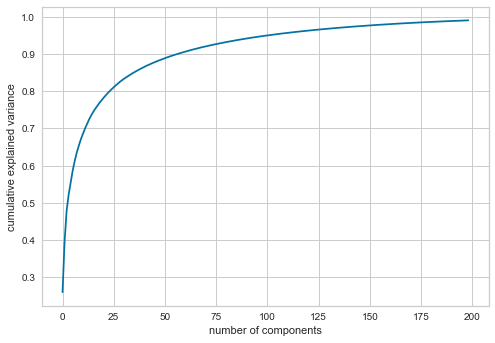

In [779]:
# to plot cumsum 
import matplotlib.pyplot as plt 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 4. Clustering
#### Apply k-means clustering with different k values (e.g., from 5 to 150, with step size of 5). You may want to save the models for later use.

In [780]:
x = df.drop("index",axis=1)
x

0         1         2         3         4         5         6     \
0    0.310345  0.398907  0.417989  0.470874  0.551351  0.654054  0.715847   
1    0.511494  0.535519  0.539683  0.606796  0.637838  0.697297  0.748634   
2    0.321839  0.442623  0.513228  0.572816  0.627027  0.718919  0.748634   
3    0.155172  0.169399  0.132275  0.179612  0.108108  0.108108  0.169399   
4    0.574713  0.633880  0.629630  0.684466  0.708108  0.762162  0.765027   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.436782  0.568306  0.613757  0.694175  0.708108  0.697297  0.721311   
396  0.390805  0.398907  0.333333  0.305825  0.183784  0.183784  0.333333   
397  0.574713  0.617486  0.661376  0.689320  0.718919  0.686486  0.715847   
398  0.178161  0.202186  0.164021  0.213592  0.135135  0.124324  0.213115   
399  0.597701  0.524590  0.243386  0.247573  0.183784  0.340541  0.606557   

         7         8         9     ...      4086      4087      4088  \
0    0.743169  0.758242  0.745763  ...  0.827778  0.728571  0.717822   
1    0.775956  0.785714  0.768362  ...  0.116667  0.138095  0.099010   
2    0.754098  0.774725  0.762712  ...  0.033333  0.109524  0.153465   
3    0.382514  0.483516  0.514124  ...  0.811111  0.690476  0.722772   
4    0.792350  0.802198  0.807910  ...  0.188889  0.142857  0.148515   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.688525  0.725275  0.762712  ...  0.455556  0.414286  0.252475   
396  0.524590  0.604396  0.666667  ...  0.444444  0.342857  0.282178   
397  0.732240  0.736264  0.768362  ...  0.194444  0.128571  0.118812   
398  0.377049  0.489011  0.559322  ...  0.533333  0.409524  0.376238   
399  0.661202  0.719780  0.649718  ...  0.305556  0.261905  0.287129   

         4089      4090      4091      4092      4093      4094      4095  
0    0.721951  0.557292  0.140777  0.113744  0.109005  0.120603  0.157068  
1    0.117073  0.151042  0.165049  0.118483  0.109005  0.110553  0.151832  
2    0.102439  0.119792  0.160194  0.109005  0.094787  0.105528  0.151832  
3    0.751220  0.875000  0.859223  0.819905  0.796209  0.839196  0.895288  
4    0.146341  0.182292  0.194175  0.146919  0.137441  0.135678  0.178010  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.058537  0.187500  0.271845  0.227488  0.118483  0.115578  0.130890  
396  0.278049  0.385417  0.461165  0.469194  0.492891  0.547739  0.654450  
397  0.131707  0.161458  0.189320  0.123223  0.137441  0.105528  0.198953  
398  0.424390  0.562500  0.601942  0.568720  0.592417  0.643216  0.722513  
399  0.297561  0.328125  0.364078  0.312796  0.345972  0.356784  0.445026  

[400 rows x 4096 columns]

In [781]:
from sklearn.cluster import KMeans
plot_points =[]
k_means = [] # save for later
for k in range(5,150,5):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train_pca)
    plot_points.append(kmeans.inertia_) # for elbow plot 
    print(kmeans.cluster_centers_) # centroids 
    k_means.append(kmeans)

[[ 1.44695722e-01 -2.01375655e+00  4.12909448e+00 -4.92140204e-02
   6.34289388e-01  3.39700242e-01 -3.01722799e-01  2.09824294e-01
  -2.42546832e-01  9.84542966e-03 -4.50149309e-02 -3.11147061e-01
  -2.47565649e-01  2.09960599e-01  2.59913200e-01 -2.42551753e-02
   1.15525435e-02  2.75402233e-02  8.50753923e-02 -1.42731028e-01
  -2.39820966e-02 -1.34498481e-01 -9.67309098e-02  6.88310474e-02
  -1.45863748e-01  3.37740916e-02 -2.36442153e-01  1.46573389e-01
  -2.99721156e-02  1.67537310e-02 -1.16790571e-01  1.40714495e-01
  -1.33022109e-01 -8.62050617e-02 -5.69783165e-03  6.33770169e-02
  -6.22450967e-02 -4.31050668e-03  2.06548011e-03 -1.30012183e-01
   5.50259311e-02  5.56769382e-02 -1.15585172e-01 -7.71138766e-02
  -5.87605182e-02 -5.11400639e-02 -4.58150593e-02  3.83990045e-02
   1.50663196e-02 -2.81348469e-02  5.79000584e-02  2.24009855e-02
  -4.39447020e-02 -5.38483841e-02 -2.16686580e-02 -7.89705666e-02
   1.80770292e-02 -8.64340914e-03 -2.81958706e-02  8.92077940e-03
  -1.37693

In [787]:
plot_points

[29550.585968116055,
 25663.870096182858,
 23063.29605946928,
 21187.1792092343,
 19371.26017363229,
 17904.250836920706,
 16683.424686066053,
 15517.935474761916,
 14614.783779164687,
 13439.223112070502,
 12626.885803666783,
 11826.709737307365,
 11206.304786694043,
 10541.636718218031,
 9825.846236947416,
 9236.808759220465,
 8643.631759549298,
 8174.399238777439,
 7642.137985682199,
 7327.657052604132,
 6854.146809313791,
 6449.159179751571,
 6036.205862318067,
 5695.016092168899,
 5324.821599669205,
 5038.012657136176,
 4658.236631357571,
 4371.02420809081,
 4063.5392554814225]

# 5. Analysis
#### Draw the elbow plot and silhouette scores plot. You can use silhouette_score from sklearn.

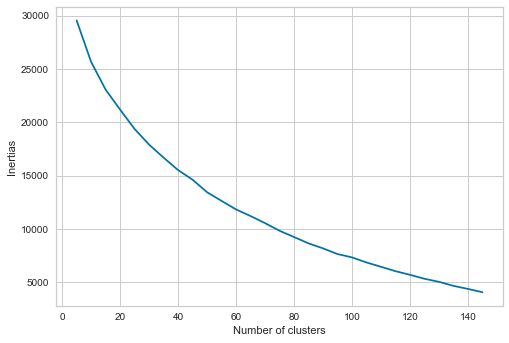

In [789]:
#Elbow plot 
plt.plot(range(5,150,5), plot_points)
plt.xlabel('Number of clusters')
plt.ylabel('Inertias') 
plt.show()

In [790]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, cluster.labels_) for cluster in k_means]
print(silhouette_scores) 
max(silhouette_scores)

[0.11731626402056732, 0.10096377254110267, 0.10714579920224242, 0.10618727389647918, 0.11973909211691408, 0.1366374676446988, 0.14572648063408977, 0.15154460774862996, 0.1617882760425485, 0.16527458296713896, 0.17731275989668335, 0.19102926179760346, 0.19181968884346273, 0.19203317196078434, 0.21312514152152368, 0.20731421446485157, 0.21502927133400762, 0.21580201265860083, 0.22006868512420427, 0.2093629306436882, 0.21535960843715807, 0.21636444814930622, 0.21347072805642664, 0.21359367107818414, 0.20990911277932023, 0.21086412688023343, 0.20671283043949726, 0.19963975014838445, 0.20438527172982157]


0.22006868512420427

In [791]:
# pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


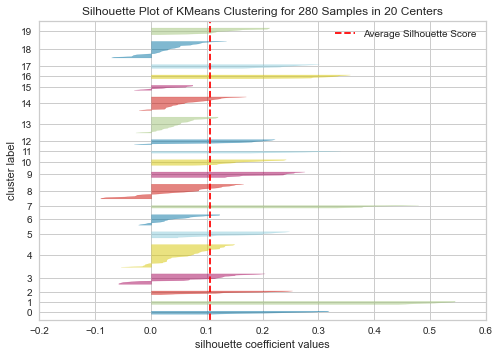

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 280 Samples in 20 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [923]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_train_pca)       
visualizer.show()

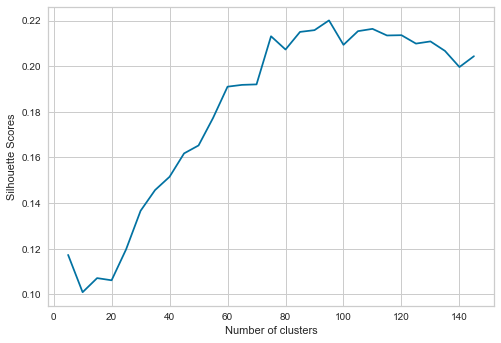

In [793]:
plt.plot(range(5,150,5), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores') 
plt.show()

#### Visualize the clusters (for 40 clusters and best k that you found from silhouette scores) to see whether there are similar faces in each cluster. You can use imshow from matplotlib to visualize images.

In [950]:
# best k 
k_list = range(5,150,5)
best_k = k_list[np.argmax(silhouette_scores)] # find maximum score to get best suitable k to implement model 
# I got 115 in the first running but it changes every time => why?
best_k

95

In [899]:
best_model = k_means[np.argmax(silhouette_scores)] # implement model 

In [800]:
best_model

KMeans(n_clusters=95, random_state=1)

In [961]:
k_means

[KMeans(n_clusters=5, random_state=1),
 KMeans(n_clusters=10, random_state=1),
 KMeans(n_clusters=15, random_state=1),
 KMeans(n_clusters=20, random_state=1),
 KMeans(n_clusters=25, random_state=1),
 KMeans(n_clusters=30, random_state=1),
 KMeans(n_clusters=35, random_state=1),
 KMeans(n_clusters=40, random_state=1),
 KMeans(n_clusters=45, random_state=1),
 KMeans(n_clusters=50, random_state=1),
 KMeans(n_clusters=55, random_state=1),
 KMeans(n_clusters=60, random_state=1),
 KMeans(n_clusters=65, random_state=1),
 KMeans(n_clusters=70, random_state=1),
 KMeans(n_clusters=75, random_state=1),
 KMeans(n_clusters=80, random_state=1),
 KMeans(n_clusters=85, random_state=1),
 KMeans(n_clusters=90, random_state=1),
 KMeans(n_clusters=95, random_state=1),
 KMeans(n_clusters=100, random_state=1),
 KMeans(n_clusters=105, random_state=1),
 KMeans(n_clusters=110, random_state=1),
 KMeans(n_clusters=115, random_state=1),
 KMeans(n_clusters=120, random_state=1),
 KMeans(n_clusters=125, random_state

In [986]:
model = KMeans(n_clusters=40, random_state=1)
model.fit(X_train_pca)
prediction = model.labels_
prediction

array([16, 36, 11, 25, 17, 36, 13, 20, 10, 18, 26, 35, 20, 23,  7, 33, 16,
        6,  1, 32, 14, 14, 21,  8, 20, 31, 14, 23, 19, 23,  4, 27, 11,  7,
       21, 25,  5, 23, 24, 20, 33, 26,  9, 10, 37,  6, 32,  6, 18,  6,  5,
       26, 18, 20, 15,  7, 34,  5,  7,  3, 19, 17, 19, 26, 17, 29, 27, 30,
        8, 10, 21, 32,  6,  3,  0, 17, 26, 12, 22, 25, 24,  7, 22,  2,  2,
        5,  8, 29, 30,  8, 17, 10, 10,  4, 22, 16, 27,  8, 33, 11,  0, 26,
       21, 33,  7,  0, 15, 20, 15, 13,  4,  2, 17, 10, 16, 21,  4, 28,  1,
        8, 16, 27, 13, 15, 15, 35,  7,  6, 10, 22, 25, 28,  4, 30, 19,  8,
       29, 37, 28,  4, 21, 31, 15,  4, 15, 10, 26, 26,  6, 10, 15, 19, 35,
        2, 20, 23, 30, 20, 26, 25, 23, 11, 39, 12,  2, 17, 35,  9,  8, 33,
       10, 17, 21, 32, 11, 21, 14,  2,  4,  4, 12, 31, 34, 20, 14,  5, 16,
        7, 30,  2, 27, 27, 28, 23,  2, 29,  3,  1, 30,  7, 27, 38, 22, 27,
        5, 33, 26, 24, 36, 15,  7,  5,  5,  6, 17, 10,  6,  4, 24, 24, 27,
       10, 13, 21, 17, 15

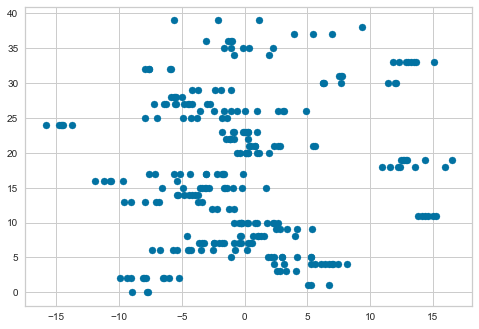

In [987]:
plt.scatter(X_train_pca[:,0],prediction)

In [988]:
y_pred = best_model.labels_

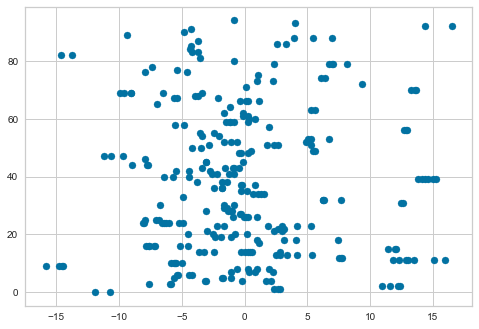

In [989]:
plt.scatter(X_train_pca[:,0],y_pred)

Cluster 0


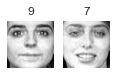

Cluster 1


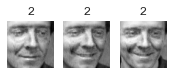

Cluster 2


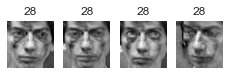

Cluster 3


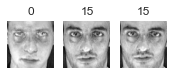

Cluster 4


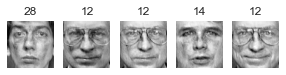

Cluster 5


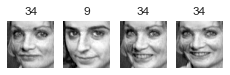

Cluster 6


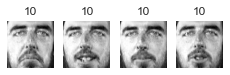

Cluster 7


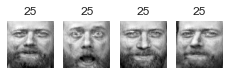

Cluster 8


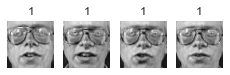

Cluster 9


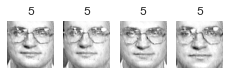

Cluster 10


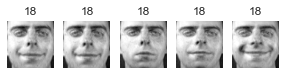

Cluster 11


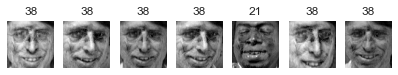

Cluster 12


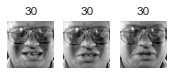

Cluster 13


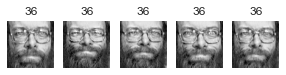

Cluster 14


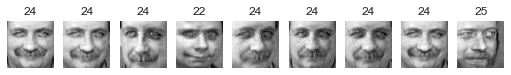

Cluster 15


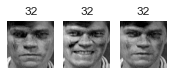

Cluster 16


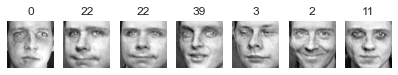

Cluster 17


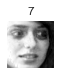

Cluster 18


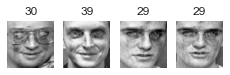

Cluster 19


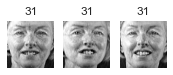

Cluster 20


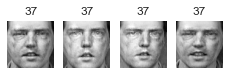

Cluster 21


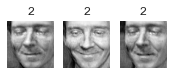

Cluster 22


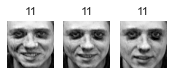

Cluster 23


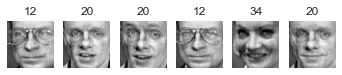

Cluster 24


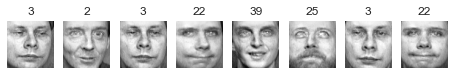

Cluster 25


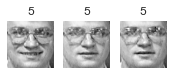

Cluster 26


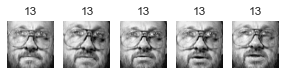

Cluster 27


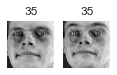

Cluster 28


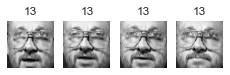

Cluster 29


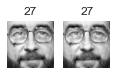

Cluster 30


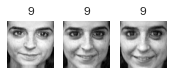

Cluster 31


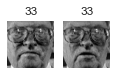

Cluster 32


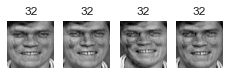

Cluster 33


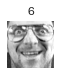

Cluster 34


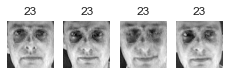

Cluster 35


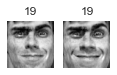

Cluster 36


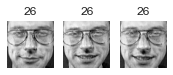

Cluster 37


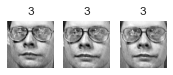

Cluster 38


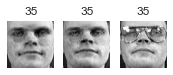

Cluster 39


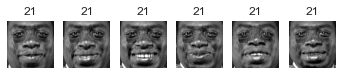

Cluster 40


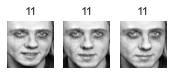

Cluster 41


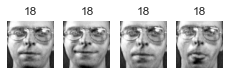

Cluster 42


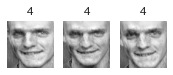

Cluster 43


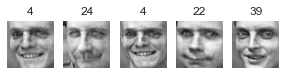

Cluster 44


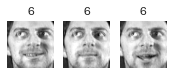

Cluster 45


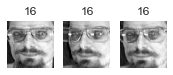

Cluster 46


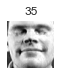

Cluster 47


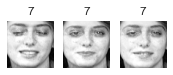

Cluster 48


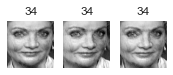

Cluster 49


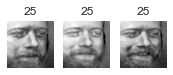

Cluster 50


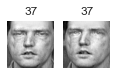

Cluster 51


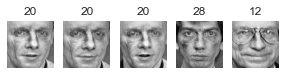

Cluster 52


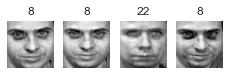

Cluster 53


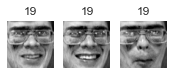

Cluster 54


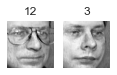

Cluster 55


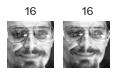

Cluster 56


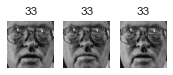

Cluster 57


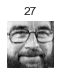

Cluster 58


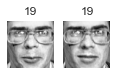

Cluster 59


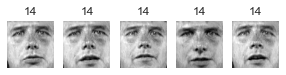

Cluster 60


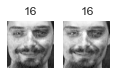

Cluster 61


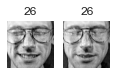

Cluster 62


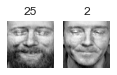

Cluster 63


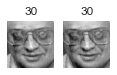

Cluster 64


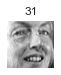

Cluster 65


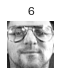

Cluster 66


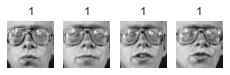

Cluster 67


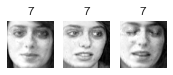

Cluster 68


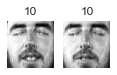

Cluster 69


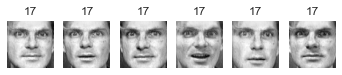

Cluster 70


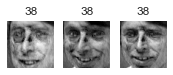

Cluster 71


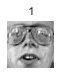

Cluster 72


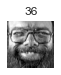

Cluster 73


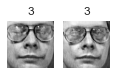

Cluster 74


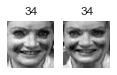

Cluster 75


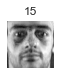

Cluster 76


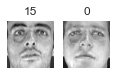

Cluster 77


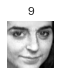

Cluster 78


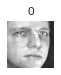

Cluster 79


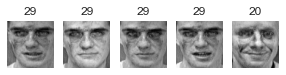

Cluster 80


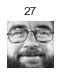

Cluster 81


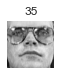

Cluster 82


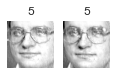

Cluster 83


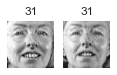

Cluster 84


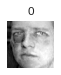

Cluster 85


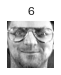

Cluster 86


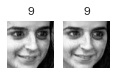

Cluster 87


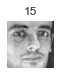

Cluster 88


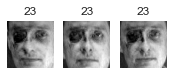

Cluster 89


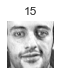

Cluster 90


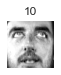

Cluster 91


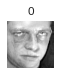

Cluster 92


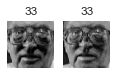

Cluster 93


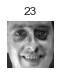

Cluster 94


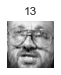

In [801]:
def plot_faces(faces, labels, n_cols=20):
    faces = faces.values.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

#### Draw the silhouette diagram for 4 values of k: 20, 40, 60, 80. You may want to use the code below from Geron (with certain adjustments):
```python
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()
```

IndexError: list index out of range

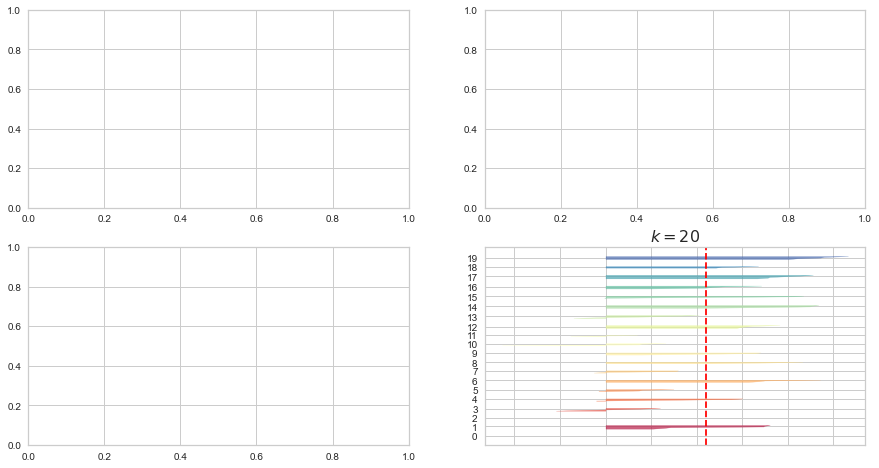

In [936]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in (20, 40, 60, 80):
    
    y_pred = k_means[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train_pca, y_pred)

    padding = len(X_train1) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.savefig("silhouette_analysis_plot")
plt.show()

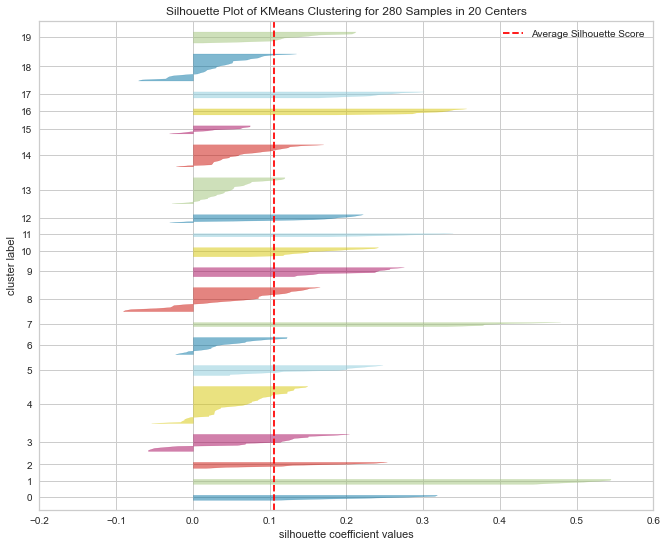

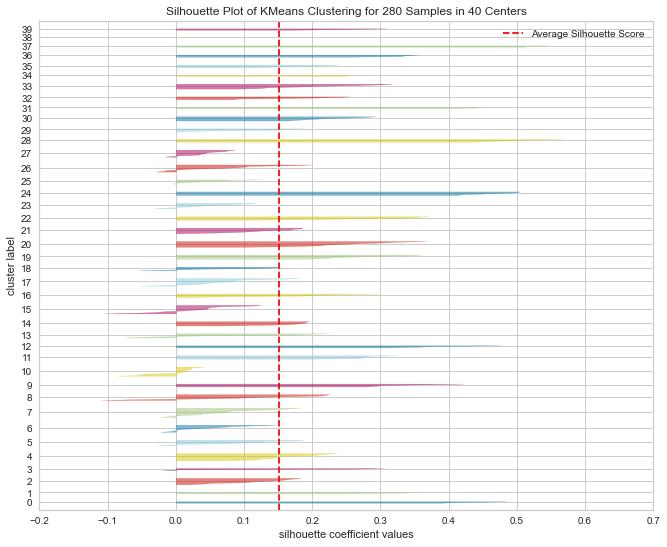

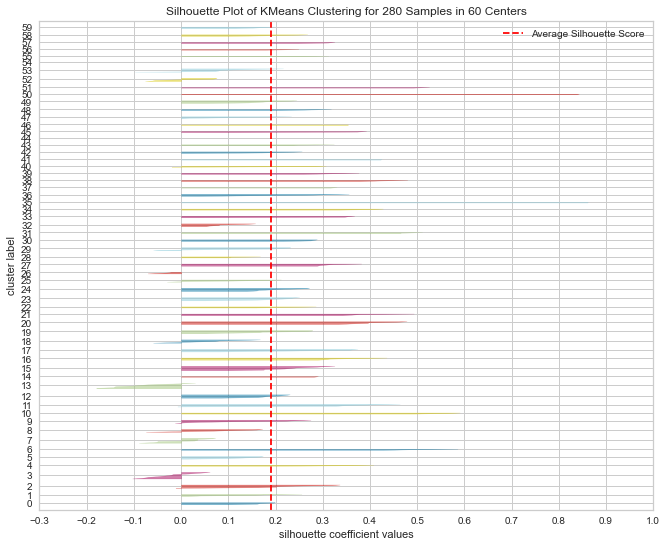

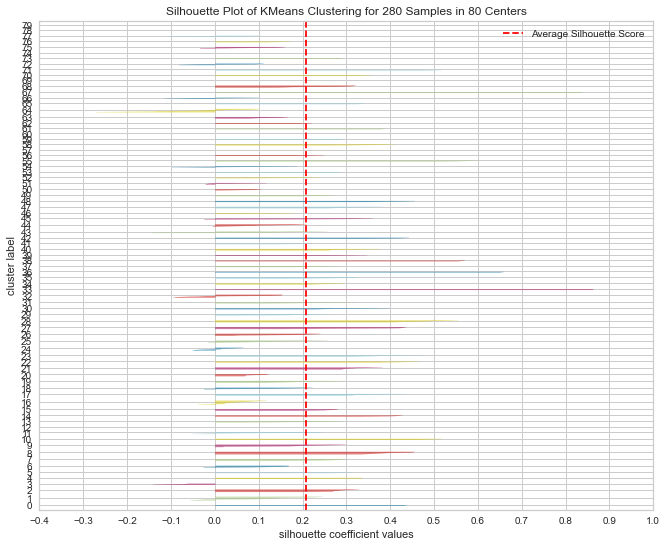

In [952]:
for i in (20,40,60,80):
    fig, ax = plt.subplots(figsize=(11,9))
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=i,random_state=1), colors='yellowbrick')
    visualizer.fit(X_train_pca)       
    visualizer.show()

# 6. Classification
#### Train a classifier on the train data to predict person on the image.

In [802]:
# first model is xgboost 
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
predictions = xgb_classifier.predict(X_test)
xgb_classifier.score(X_valid, y_valid) # evaluate model on validation set

0.7125

In [803]:
predictions

array([38, 29, 24, 16, 35,  2, 22, 33, 10, 15, 30, 39,  8, 15,  1,  8, 34,
       30,  2, 10, 18,  8, 26, 15, 15, 19,  3, 11, 29, 28, 30, 23, 23,  7,
       37, 27, 26, 33, 21, 31], dtype=int64)

In [804]:
np.array(y_test)

array([38, 29, 27,  4, 35, 37,  8, 33, 10, 15, 30, 39,  8, 15,  1,  8, 16,
       30,  2, 10, 18,  8, 26, 15,  0, 19,  6, 11, 29, 28, 30, 23, 23, 27,
        4, 27, 26, 33, 21, 27])

In [805]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_pca, y_train)
predictions_pca = xgb_classifier.predict(X_test_pca)
xgb_classifier.score(X_valid_pca, y_valid)

0.7125

In [806]:
predictions_pca

array([21, 29, 10,  8, 35, 25, 29, 33, 10, 15, 30,  9, 24, 39,  1,  8, 16,
       30,  2, 10, 18, 16, 26, 15,  7, 19,  6, 11, 29, 28, 30, 23, 23, 35,
       11, 27, 11, 33, 21, 19], dtype=int64)

In [807]:
np.array(y_test)

array([38, 29, 27,  4, 35, 37,  8, 33, 10, 15, 30, 39,  8, 15,  1,  8, 16,
       30,  2, 10, 18,  8, 26, 15,  0, 19,  6, 11, 29, 28, 30, 23, 23, 27,
        4, 27, 26, 33, 21, 27])

In [808]:
# decision tree model 
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=1)
classsifier.fit(X_train_pca, y_train)
classifier.score(X_valid_pca, y_valid) # score is too low 

0.525

In [809]:
from sklearn.ensemble import RandomForestClassifier
# instead of grid search I checked different n_estimators values manually
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train) # without PCA()
classifierclassifier.score(X_valid, y_valid)

0.925

In [831]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=50,random_state=1)
classifier.fit(X_train, y_train) # without PCA()
classifier.score(X_valid, y_valid)

0.9375

In [827]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150,random_state=1)
classifier.fit(X_train_pca, y_train)
classifier.score(X_valid_pca, y_valid)

0.8625

In [836]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50,random_state=1)
classifier.fit(X_train_pca, y_train)
classifier.score(X_valid_pca, y_valid)

0.8

In [839]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=1)
classifier.fit(X_train_pca, y_train)
classifier.score(X_valid_pca, y_valid)

0.85

#### Use best k-means model as a dimensionality reduction technique to reduce the dataset and train a classifier on the reduced data. Your data will have shape (280, number of clusters in the best model). You can use transform method of the k-means model.

In [811]:
k_means

[KMeans(n_clusters=5, random_state=1),
 KMeans(n_clusters=10, random_state=1),
 KMeans(n_clusters=15, random_state=1),
 KMeans(n_clusters=20, random_state=1),
 KMeans(n_clusters=25, random_state=1),
 KMeans(n_clusters=30, random_state=1),
 KMeans(n_clusters=35, random_state=1),
 KMeans(n_clusters=40, random_state=1),
 KMeans(n_clusters=45, random_state=1),
 KMeans(n_clusters=50, random_state=1),
 KMeans(n_clusters=55, random_state=1),
 KMeans(n_clusters=60, random_state=1),
 KMeans(n_clusters=65, random_state=1),
 KMeans(n_clusters=70, random_state=1),
 KMeans(n_clusters=75, random_state=1),
 KMeans(n_clusters=80, random_state=1),
 KMeans(n_clusters=85, random_state=1),
 KMeans(n_clusters=90, random_state=1),
 KMeans(n_clusters=95, random_state=1),
 KMeans(n_clusters=100, random_state=1),
 KMeans(n_clusters=105, random_state=1),
 KMeans(n_clusters=110, random_state=1),
 KMeans(n_clusters=115, random_state=1),
 KMeans(n_clusters=120, random_state=1),
 KMeans(n_clusters=125, random_state

In [812]:
# we should choose the best model to apply therefore:
best_model = k_means[np.argmax(silhouette_scores)]
best_model

KMeans(n_clusters=95, random_state=1)

In [813]:
reduce_x_train = best_model.transform(X_train_pca)
reduce_x_valid = best_model.transform(X_valid_pca)
reduce_x_test = best_model.transform(X_test_pca)

In [814]:
reduce_x_train.shape,reduce_x_valid.shape,reduce_x_test.shape

((280, 95), (80, 95), (40, 95))

In [848]:
classifier = RandomForestClassifier(n_estimators=50, random_state=1)
classifier.fit(reduce_x_train, y_train)
classifier.score(reduce_x_valid, y_valid) # evaluate model on validation set

0.7625

#### Create a pipeline to reduce the data (with k-means) with different numbers of clusters and train a classifier. Find out which value of k gives the best classification result.

In [872]:
# pipeline 
# I will use Random Forest model inside of pipeline because its accuracy is higher than others 
from sklearn.pipeline import Pipeline
result_list = []
for cls in k_list:
    pipeline = Pipeline([("kmeans", KMeans(n_clusters=cls, random_state=1)),
        ("random_forest", RandomForestClassifier(n_estimators=50, random_state=1))])
    pipeline.fit(X_train_pca, y_train)
    result_list.append(pipeline.score(X_valid_pca, y_valid)*100)
    print(f"k value: {cls}, score: {pipeline.score(X_valid_pca, y_valid)*100}")

k value: 5, score: 36.25
k value: 10, score: 47.5
k value: 15, score: 56.25
k value: 20, score: 55.00000000000001
k value: 25, score: 65.0
k value: 30, score: 66.25
k value: 35, score: 65.0
k value: 40, score: 63.74999999999999
k value: 45, score: 61.25000000000001
k value: 50, score: 76.25
k value: 55, score: 72.5
k value: 60, score: 70.0
k value: 65, score: 75.0
k value: 70, score: 77.5
k value: 75, score: 75.0
k value: 80, score: 75.0
k value: 85, score: 77.5
k value: 90, score: 68.75
k value: 95, score: 76.25
k value: 100, score: 75.0
k value: 105, score: 75.0
k value: 110, score: 73.75
k value: 115, score: 76.25
k value: 120, score: 71.25
k value: 125, score: 73.75
k value: 130, score: 75.0
k value: 135, score: 71.25
k value: 140, score: 77.5
k value: 145, score: 72.5


In [870]:
max(result_list) # k = 70,85,140
# best k value can be 85 

77.5

In [852]:
#pipeline.fit(X_train_pca, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=145, random_state=1)),
                ('random_forest',
                 RandomForestClassifier(n_estimators=50, random_state=1))])

In [855]:
#print(cls)
#print(pipeline.score(X_valid1_pca, y_valid)*100)

145
72.5


#### Add new features to original set of features and check again. Did you get better result than the case without new features?

In [ ]:
# how can we find new features to add?
# in this situation we have just one way => remained data that we don't use is reduced data with kmeans 

In [ ]:
# NOTE: we should add features to all parts of pca dataset(pca train,pca test,pca valid)

In [873]:
add_to_train = np.c_[X_train_pca, reduce_x_train]
add_to_valid = np.c_[X_valid_pca, reduce_x_valid]
add_to_test = np.c_[X_test_pca, reduce_x_test]

In [876]:
X_train_pca.shape

(280, 199)

In [877]:
reduce_x_train.shape

(280, 95)

In [875]:
add_to_train.shape

(280, 294)

In [879]:
X_valid_pca.shape

(80, 199)

In [881]:
reduce_x_valid.shape

(80, 95)

In [878]:
add_to_valid.shape

(80, 294)

In [888]:
random_forest1 = RandomForestClassifier(n_estimators=50, random_state=1)
random_forest1.fit(add_to_train,y_train)
random_forest1.score(add_to_valid, y_valid)*100

75.0

In [887]:
random_forest1 = RandomForestClassifier(n_estimators=150, random_state=1)
random_forest1.fit(add_to_train,y_train)
random_forest1.score(add_to_valid, y_valid)*100

81.25

In [890]:
random_forest1 = RandomForestClassifier(n_estimators=80, random_state=1)
random_forest1.fit(add_to_train,y_train)
random_forest1.score(add_to_valid, y_valid)*100 # yes, score increased from 77.25 to 82.5

82.5

In [891]:
random_forest1 = RandomForestClassifier(n_estimators=120, random_state=1)
random_forest1.fit(add_to_train,y_train)
random_forest1.score(add_to_valid, y_valid)*100

82.5

In [960]:
for cls in k_list:
    pipeline = Pipeline([("kmeans", KMeans(n_clusters=cls, random_state=1)),
        ("random_forest", RandomForestClassifier(n_estimators=80, random_state=1))])
    pipeline.fit(add_to_train, y_train)
    result_list.append(pipeline.score(add_to_valid, y_valid)*100)
    print(f"k value: {cls}, score: {pipeline.score(add_to_valid, y_valid)*100}")

k value: 5, score: 28.749999999999996
k value: 10, score: 28.749999999999996
k value: 15, score: 48.75
k value: 20, score: 41.25
k value: 25, score: 40.0
k value: 30, score: 50.0
k value: 35, score: 48.75
k value: 40, score: 45.0
k value: 45, score: 48.75
k value: 50, score: 50.0
k value: 55, score: 50.0
k value: 60, score: 48.75
k value: 65, score: 55.00000000000001
k value: 70, score: 50.0
k value: 75, score: 51.24999999999999
k value: 80, score: 52.5
k value: 85, score: 53.75
k value: 90, score: 50.0
k value: 95, score: 56.25
k value: 100, score: 48.75
k value: 105, score: 52.5
k value: 110, score: 53.75
k value: 115, score: 47.5
k value: 120, score: 50.0
k value: 125, score: 52.5
k value: 130, score: 55.00000000000001
k value: 135, score: 48.75
k value: 140, score: 48.75
k value: 145, score: 52.5
